Przewidywana cena mieszkania za 5 lat: 153153.79 zł
Wymagana miesięczna wpłata do banku: 1875.28 zł


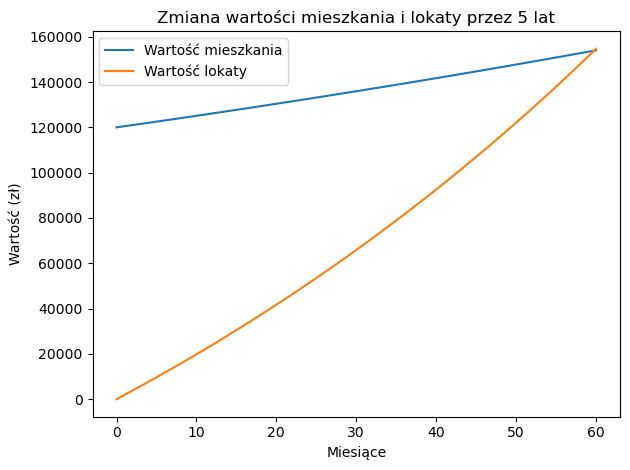

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numpy_financial import pmt

# Dane początkowe
PV = 120000  # początkowa cena mieszkania (120 tys. zł)
annual_interest_rate_apartment = 0.05  # roczna stopa wzrostu ceny mieszkania
years = 5

# Obliczenie przyszłej wartości mieszkania
FV_apartment = PV * (1 + annual_interest_rate_apartment)**years

print(f"Przewidywana cena mieszkania za 5 lat: {FV_apartment:.2f} zł")

# Dane bankowe
annual_interest_rate_bank = 0.12  # roczna stopa procentowa lokaty
monthly_interest_rate_bank = annual_interest_rate_bank / 12
n_months = years * 12

# Obliczenie miesięcznej wpłaty do banku (PMT)
PMT = -pmt(monthly_interest_rate_bank, n_months, 0, FV_apartment)

print(f"Wymagana miesięczna wpłata do banku: {PMT:.2f} zł")

# Generowanie danych do wykresu
months = np.arange(0, n_months + 1)
apartment_value = PV * (1 + annual_interest_rate_apartment / 12)**months
investment_value = np.zeros_like(months)
investment_value[0] = 0  # początkowa wartość lokaty

for i in range(1, n_months + 1):
    investment_value[i] = (investment_value[i - 1] + PMT) * (1 + monthly_interest_rate_bank)


# Wykres
plt.plot(months, apartment_value, label='Wartość mieszkania')
plt.plot(months, investment_value, label='Wartość lokaty')
plt.title('Zmiana wartości mieszkania i lokaty przez 5 lat')
plt.xlabel('Miesiące')
plt.ylabel('Wartość (zł)')
plt.legend()
plt.tight_layout()
plt.show()